# Model training and evaluation (static data)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df_results = pd.DataFrame()

In [3]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls):
    global df_results
    
    predicted = cls.predict(X_test)
    sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, predicted))
    print()
    print(metrics.classification_report(y_test, predicted))
    print('macro precision: ',metrics.precision_score(y_test, predicted, average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, predicted, average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, predicted, average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, predicted, average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, predicted, average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, predicted, average='macro'))
    
    df_result = pd.DataFrame({
        'Algoritmus': [str(cls).split('(')[0]],
        
        'Transformácia': ['áno' if transformed else 'nie'],
        
        'S': [round(metrics.accuracy_score(y_test, predicted), 2)],
        
        'P_0': [round(precision_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'P_1': [round(precision_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'P_2': [round(precision_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'P_3': [round(precision_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'Ú_0': [round(recall_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'Ú_1': [round(recall_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'Ú_2': [round(recall_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'Ú_3': [round(recall_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'F1_makro': [round(metrics.f1_score(y_test, predicted, average='macro'), 2)],
    })
        
    df_results = df_results.append(df_result, ignore_index=True)
    
    plt.show()

In [4]:
def train_eval(classifier, rand_state = False, **kwargs):
    if rand_state:
        cls = classifier(random_state=16, **kwargs)
    else:
        cls = classifier(**kwargs)
    cls.fit(X_train, y_train)
    print_metrics(cls)

## Categorical data

In [5]:
# prepare categorical features (one hot encoded)
categorical_train = pd.read_csv('data/split/transformed/train_categories.csv', index_col=0)
categorical_test = pd.read_csv('data/split/transformed/test_categories.csv', index_col=0)

In [6]:
categorical_train.shape

(18296, 60)

In [7]:
categorical_test.shape

(6099, 60)

## LSA groups

In [8]:
# prepare LSA groups
lsa_train = pd.read_csv('data/split/nlp/min_max_df/train_lsa.csv', index_col=0)
lsa_test = pd.read_csv('data/split/nlp/min_max_df/test_lsa.csv', index_col=0)

# contained in static+dynamic data
lsa_train.drop(['ratio_running_duration'], axis=1, inplace=True)
lsa_test.drop(['ratio_running_duration'], axis=1, inplace=True)

# rename columns
lsa_train.rename(columns= lambda x: 'LSA_' + str(x), inplace=True)
lsa_test.rename(columns= lambda x: 'LSA_' + str(x), inplace=True)

In [9]:
lsa_train.shape

(18296, 25)

In [10]:
lsa_test.shape

(6099, 25)

## LDA topics

In [11]:
# prepare LDA topics
lda_train = pd.read_csv('data/split/nlp/train_lda25.csv', index_col=0)
lda_test = pd.read_csv('data/split/nlp/test_lda25.csv', index_col=0)

# contained in static+dynamic data
lda_train.drop(['ratio_running_duration'], axis=1, inplace=True)
lda_test.drop(['ratio_running_duration'], axis=1, inplace=True)

# rename columns
lda_train.rename(columns= lambda x: 'LDA_' + str(x), inplace=True)
lda_test.rename(columns= lambda x: 'LDA_' + str(x), inplace=True)

In [12]:
lda_train.shape

(18296, 25)

In [13]:
lda_test.shape

(6099, 25)

## Original data (no scaling, no normalization)

In [14]:
# prepare original data 
X_train = pd.read_csv('data/split/transformed/train_original.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test_original.csv', index_col=0)

# merge with categorical, lsa and lda
X_train = pd.concat([X_train, categorical_train, lsa_train, lda_train], axis=1)
X_test = pd.concat([X_test, categorical_test, lsa_test, lda_test], axis=1)

# as we will use only static (meta) data, we can use all projects for prediction
#X_train = X_train[(X_train['ratio_running_duration'] >= 0) & (X_train['ratio_running_duration'] < 25)]
#X_test = X_test[(X_test['ratio_running_duration'] >= 0) & (X_test['ratio_running_duration'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop('class', axis=1, inplace=True)
X_test.drop('class', axis=1, inplace=True)

In [15]:
X_train.shape

(18296, 151)

In [16]:
X_test.shape

(6099, 151)

In [17]:
dynamic_data = [
    'average_pledge',
    'backers_count',
    'days_remaining',
    'days_running',
    'pledged',
    'ratio_pledged_goal',
    'ratio_running_duration',
    'staff_pick',
    'usd_pledged',
    'faq_count_while_scraping',
    'comments_count_creator_while_scraping',
    'comments_count_public_while_scraping',
    'updates_count_while_scraping',
    'updates_likes_sum_while_scraping',
    'updates_likes_mean_while_scraping',
    'updates_likes_min_while_scraping',
    'updates_likes_max_while_scraping',
    'updates_likes_median_while_scraping'
]

In [18]:
X_train.drop(dynamic_data, axis=1, inplace=True)
X_test.drop(dynamic_data, axis=1, inplace=True)

In [19]:
X_train.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18296 entries, 0 to 18295
Data columns (total 133 columns):
category_position               18296 non-null int64
days_duration                   18296 non-null int64
days_preparation                18296 non-null int64
db_duration                     18296 non-null int64
goal                            18296 non-null float64
usd_goal                        18296 non-null int64
deadline_year                   18296 non-null int64
deadline_month                  18296 non-null int64
deadline_day                    18296 non-null int64
deadline_dayofweek              18296 non-null int64
deadline_hour                   18296 non-null int64
launch_year                     18296 non-null int64
launch_month                    18296 non-null int64
launch_day                      18296 non-null int64
launch_dayofweek                18296 non-null int64
launch_hour                     18296 non-null int64
image_count                     18296 no

In [20]:
transformed = False

## Classifiers

accuracy:  0.521888834235

             precision    recall  f1-score   support

          1       0.64      0.70      0.67      2580
          2       0.25      0.02      0.04       772
          3       0.40      0.41      0.40      1385
          4       0.44      0.58      0.50      1362

avg / total       0.49      0.52      0.49      6099

macro precision:  0.434405774522
micro precision:  0.521888834235

micro recall:  0.521888834235
macro recall:  0.429290800125

micro f1:  0.521888834235
macro f1:  0.405616633735


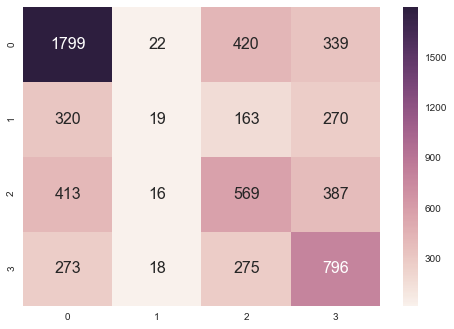

In [21]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.535825545171

             precision    recall  f1-score   support

          1       0.71      0.70      0.70      2580
          2       0.28      0.31      0.29       772
          3       0.41      0.42      0.42      1385
          4       0.51      0.47      0.49      1362

avg / total       0.54      0.54      0.54      6099

macro precision:  0.475428999705
micro precision:  0.535825545171

micro recall:  0.535825545171
macro recall:  0.475042561819

micro f1:  0.535825545171
macro f1:  0.47483194003


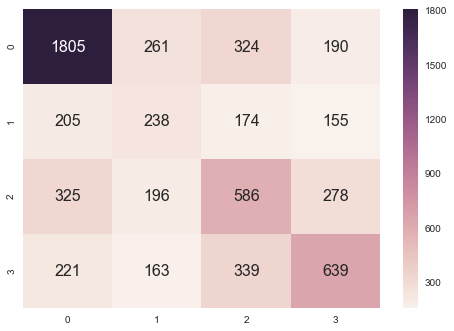

In [22]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.494507296278

             precision    recall  f1-score   support

          1       0.64      0.63      0.64      2580
          2       0.26      0.27      0.27       772
          3       0.41      0.41      0.41      1385
          4       0.45      0.44      0.45      1362

avg / total       0.50      0.49      0.50      6099

macro precision:  0.439490696271
micro precision:  0.494507296278

micro recall:  0.494507296278
macro recall:  0.440293323207

micro f1:  0.494507296278
macro f1:  0.439812438775


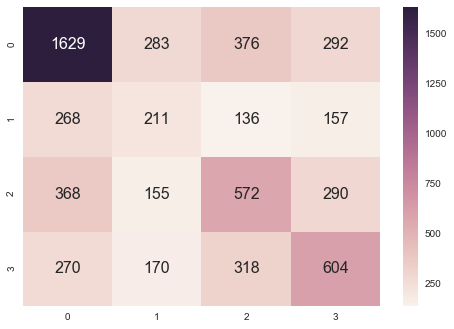

In [23]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.588785046729

             precision    recall  f1-score   support

          1       0.65      0.85      0.74      2580
          2       0.40      0.20      0.27       772
          3       0.50      0.45      0.47      1385
          4       0.57      0.46      0.51      1362

avg / total       0.57      0.59      0.57      6099

macro precision:  0.530158910518
micro precision:  0.588785046729

micro recall:  0.588785046729
macro recall:  0.48999811621

micro f1:  0.588785046729
macro f1:  0.496975797643


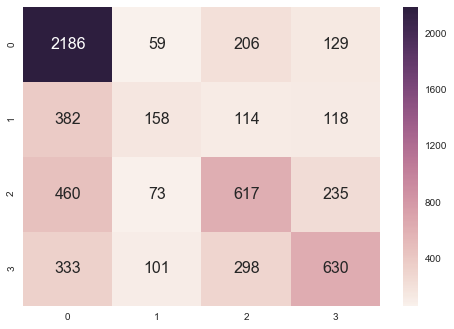

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.26676504345

             precision    recall  f1-score   support

          1       0.92      0.08      0.15      2580
          2       0.14      0.08      0.10       772
          3       0.25      0.93      0.39      1385
          4       0.23      0.05      0.08      1362

avg / total       0.51      0.27      0.18      6099

macro precision:  0.383813956551
micro precision:  0.26676504345

micro recall:  0.26676504345
macro recall:  0.284848170281

micro f1:  0.26676504345
macro f1:  0.182096015354


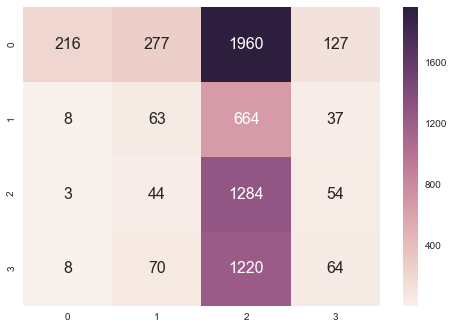

In [25]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.467453680931

             precision    recall  f1-score   support

          1       0.56      0.75      0.64      2580
          2       0.18      0.12      0.14       772
          3       0.33      0.29      0.31      1385
          4       0.46      0.31      0.37      1362

avg / total       0.44      0.47      0.44      6099

macro precision:  0.383042996731
micro precision:  0.467453680931

micro recall:  0.467453680931
macro recall:  0.367300300305

micro f1:  0.467453680931
macro f1:  0.36598681021


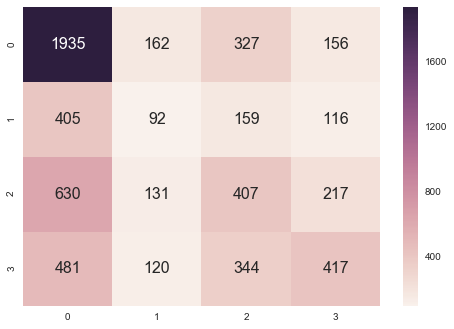

In [26]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.573372684047

             precision    recall  f1-score   support

          1       0.63      0.85      0.72      2580
          2       0.25      0.02      0.04       772
          3       0.47      0.40      0.43      1385
          4       0.54      0.55      0.54      1362

avg / total       0.52      0.57      0.53      6099

macro precision:  0.472048244289
micro precision:  0.573372684047

micro recall:  0.573372684047
macro recall:  0.453052344765

micro f1:  0.573372684047
macro f1:  0.432741714686


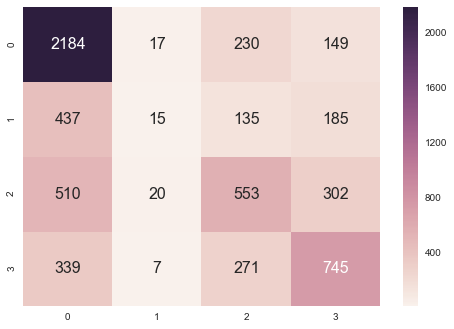

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [28]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


accuracy:  0.580423020167

             precision    recall  f1-score   support

          1       0.64      0.86      0.73      2580
          2       0.21      0.01      0.02       772
          3       0.48      0.39      0.43      1385
          4       0.54      0.56      0.55      1362

avg / total       0.52      0.58      0.53      6099

macro precision:  0.464862754802
micro precision:  0.580423020167

micro recall:  0.580423020167
macro recall:  0.45632420347

micro f1:  0.580423020167
macro f1:  0.433078238512


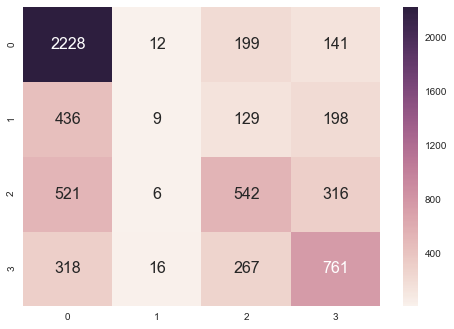

In [29]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.508607968519

             precision    recall  f1-score   support

          1       0.54      0.91      0.68      2580
          2       0.50      0.00      0.00       772
          3       0.29      0.12      0.17      1385
          4       0.49      0.44      0.46      1362

avg / total       0.47      0.51      0.43      6099

macro precision:  0.456069488846
micro precision:  0.508607968519

micro recall:  0.508607968519
macro recall:  0.366073001017

micro f1:  0.508607968519
macro f1:  0.328410407168


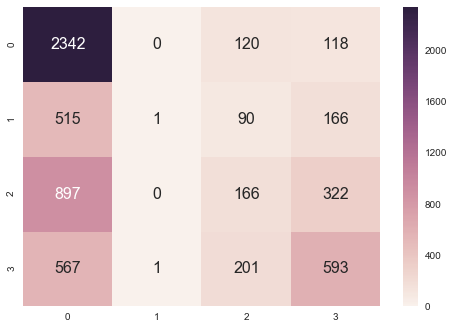

In [30]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.412854566322

             precision    recall  f1-score   support

          1       0.55      0.74      0.63      2580
          2       0.13      0.20      0.16       772
          3       0.33      0.11      0.17      1385
          4       0.30      0.22      0.25      1362

avg / total       0.39      0.41      0.38      6099

macro precision:  0.329713787656
micro precision:  0.412854566322

micro recall:  0.412854566322
macro recall:  0.318319395102

micro f1:  0.412854566322
macro f1:  0.303189088423


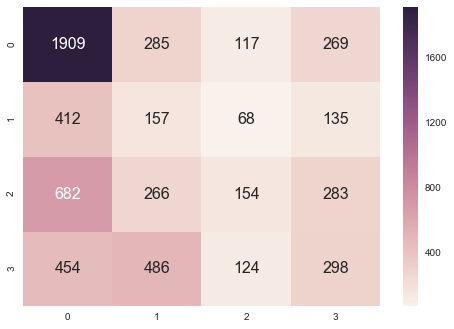

In [31]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.261190359075

             precision    recall  f1-score   support

          1       0.80      0.13      0.23      2580
          2       0.13      0.25      0.17       772
          3       0.26      0.74      0.38      1385
          4       0.17      0.03      0.04      1362

avg / total       0.45      0.26      0.21      6099

macro precision:  0.337977495715
micro precision:  0.261190359075

micro recall:  0.261190359075
macro recall:  0.286458176548

micro f1:  0.261190359075
macro f1:  0.205609041259


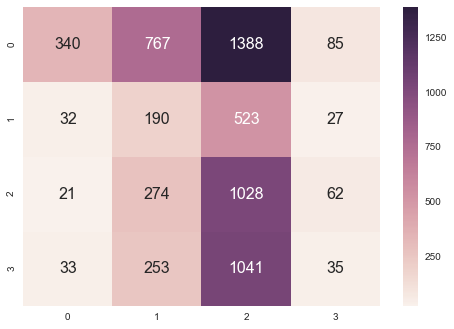

In [32]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.419085095917

             precision    recall  f1-score   support

          1       0.42      0.98      0.59      2580
          2       0.09      0.00      0.01       772
          3       0.46      0.00      0.01      1385
          4       0.23      0.01      0.02      1362

avg / total       0.35      0.42      0.26      6099

macro precision:  0.2996898196
micro precision:  0.419085095917

micro recall:  0.419085095917
macro recall:  0.249896713137

micro f1:  0.419085095917
macro f1:  0.155991739981


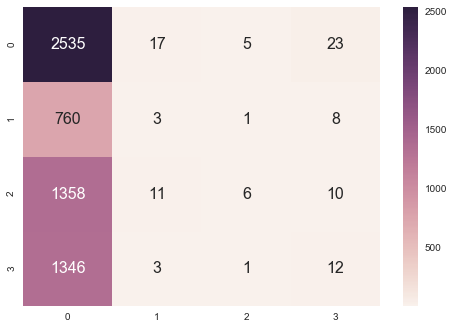

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [34]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.603705525496

             precision    recall  f1-score   support

          1       0.67      0.84      0.75      2580
          2       0.41      0.20      0.27       772
          3       0.49      0.44      0.46      1385
          4       0.60      0.55      0.57      1362

avg / total       0.58      0.60      0.58      6099

macro precision:  0.542207692461
micro precision:  0.603705525496

micro recall:  0.603705525496
macro recall:  0.50735403428

micro f1:  0.603705525496
macro f1:  0.512943895336


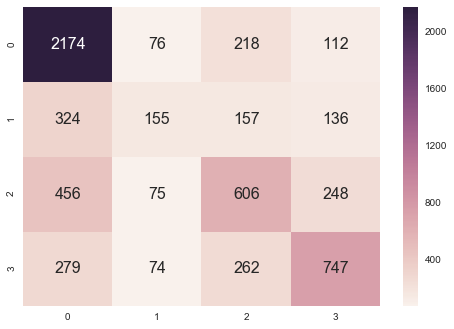

In [35]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6634753105146765e-17 / 1.1102230246251565e-16
  RuntimeWarning)


accuracy:  0.569601574029

             precision    recall  f1-score   support

          1       0.60      0.88      0.72      2580
          2       0.00      0.00      0.00       772
          3       0.48      0.34      0.40      1385
          4       0.54      0.54      0.54      1362

avg / total       0.49      0.57      0.51      6099

macro precision:  0.406620372509
micro precision:  0.569601574029

micro recall:  0.569601574029
macro recall:  0.439449616287

micro f1:  0.569601574029
macro f1:  0.413333147835


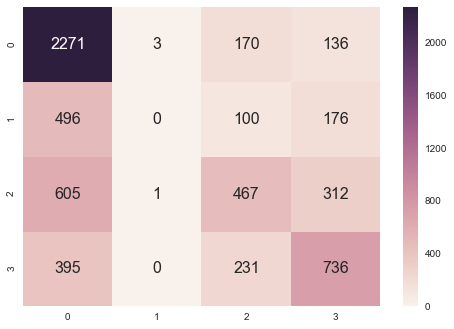

In [36]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.538284964748

             precision    recall  f1-score   support

          1       0.75      0.65      0.69      2580
          2       0.14      0.00      0.00       772
          3       0.42      0.46      0.44      1385
          4       0.42      0.72      0.53      1362

avg / total       0.52      0.54      0.51      6099

macro precision:  0.431684137275
micro precision:  0.538284964748

micro recall:  0.538284964748
macro recall:  0.456256410989

micro f1:  0.538284964748
macro f1:  0.415625593268


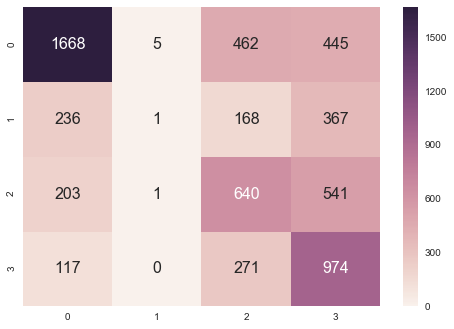

In [37]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.487129037547

             precision    recall  f1-score   support

          1       0.48      0.90      0.62      2580
          2       0.55      0.16      0.25       772
          3       0.50      0.19      0.27      1385
          4       0.56      0.19      0.28      1362

avg / total       0.51      0.49      0.42      6099

macro precision:  0.521128185083
micro precision:  0.487129037547

micro recall:  0.487129037547
macro recall:  0.360199243613

micro f1:  0.487129037547
macro f1:  0.356812139549


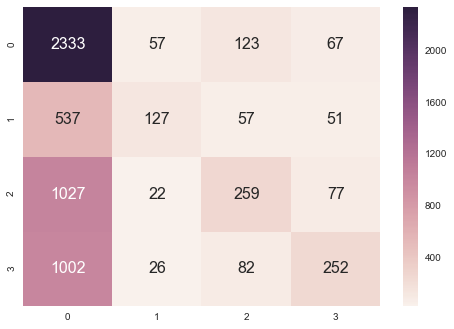

In [38]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.494343334973

             precision    recall  f1-score   support

          1       0.47      0.96      0.63      2580
          2       0.94      0.13      0.23       772
          3       0.62      0.16      0.25      1385
          4       0.62      0.15      0.24      1362

avg / total       0.60      0.49      0.41      6099

macro precision:  0.661521634162
micro precision:  0.494343334973

micro recall:  0.494343334973
macro recall:  0.351518809029

micro f1:  0.494343334973
macro f1:  0.339520047733


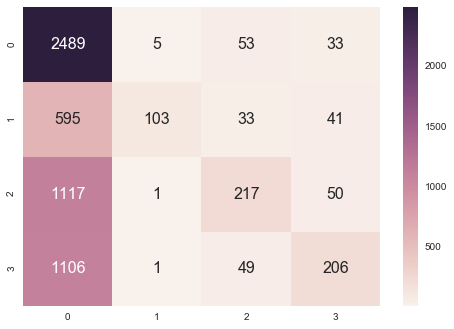

In [39]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.489424495819

             precision    recall  f1-score   support

          1       0.57      0.72      0.64      2580
          2       0.28      0.23      0.25       772
          3       0.40      0.33      0.36      1385
          4       0.46      0.36      0.40      1362

avg / total       0.47      0.49      0.47      6099

macro precision:  0.427825869102
micro precision:  0.489424495819

micro recall:  0.489424495819
macro recall:  0.410367242692

micro f1:  0.489424495819
macro f1:  0.414080356782


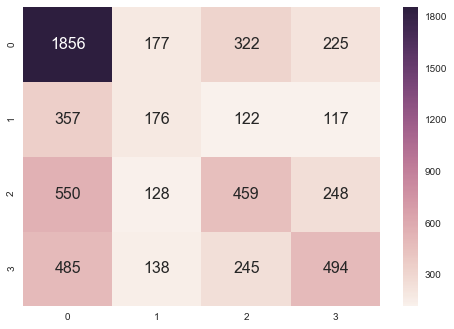

In [40]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.61436301033

             precision    recall  f1-score   support

          1       0.70      0.86      0.77      2580
          2       0.34      0.04      0.08       772
          3       0.49      0.48      0.49      1385
          4       0.56      0.60      0.58      1362

avg / total       0.58      0.61      0.58      6099

macro precision:  0.52232853841
micro precision:  0.61436301033

micro recall:  0.61436301033
macro recall:  0.497646030881

micro f1:  0.61436301033
macro f1:  0.479252541006


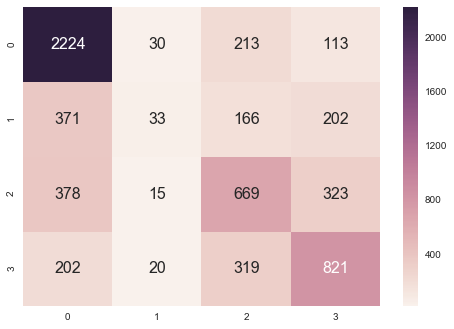

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [42]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.22331529759

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      2580
          2       0.00      0.00      0.00       772
          3       0.00      0.00      0.00      1385
          4       0.22      1.00      0.37      1362

avg / total       0.05      0.22      0.08      6099

macro precision:  0.0558288243974
micro precision:  0.22331529759

micro recall:  0.22331529759
macro recall:  0.25

micro f1:  0.22331529759
macro f1:  0.0912746280659


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

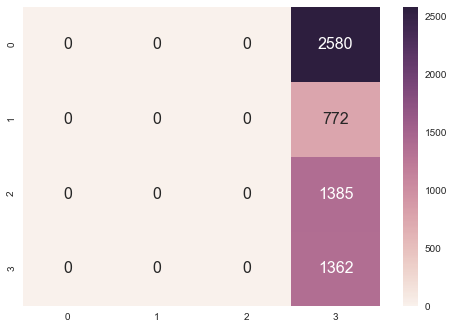

In [43]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [44]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [45]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.264961469093

             precision    recall  f1-score   support

          1       0.62      0.23      0.33      2580
          2       0.12      0.40      0.19       772
          3       0.25      0.01      0.02      1385
          4       0.27      0.52      0.36      1362

avg / total       0.40      0.26      0.25      6099

macro precision:  0.318108114829
micro precision:  0.264961469093

micro recall:  0.264961469093
macro recall:  0.289010186847

micro f1:  0.264961469093
macro f1:  0.224937703047


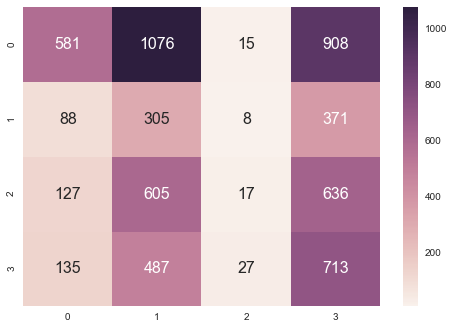

In [46]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.264961469093

             precision    recall  f1-score   support

          1       0.62      0.23      0.33      2580
          2       0.12      0.40      0.19       772
          3       0.25      0.01      0.02      1385
          4       0.27      0.52      0.36      1362

avg / total       0.40      0.26      0.25      6099

macro precision:  0.318108114829
micro precision:  0.264961469093

micro recall:  0.264961469093
macro recall:  0.289010186847

micro f1:  0.264961469093
macro f1:  0.224937703047


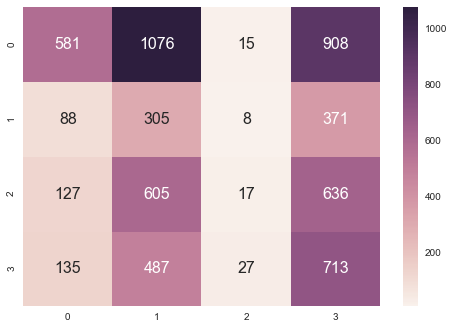

In [47]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.196261682243

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      2580
          2       0.13      0.63      0.21       772
          3       0.00      0.00      0.00      1385
          4       0.32      0.52      0.40      1362

avg / total       0.09      0.20      0.12      6099

macro precision:  0.111793413306
micro precision:  0.196261682243

micro recall:  0.196261682243
macro recall:  0.288030308218

micro f1:  0.196261682243
macro f1:  0.151726162657


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

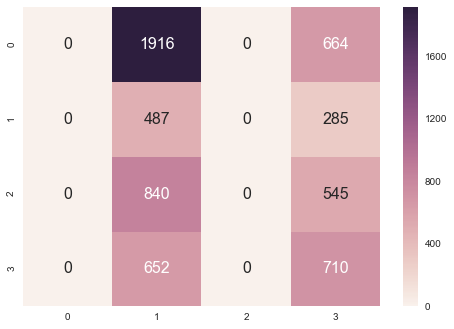

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [49]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.52,0.64,0.25,0.40,0.44,0.70,0.02,0.41,0.58,0.41
1,DecisionTreeClassifier,nie,0.54,0.71,0.28,0.41,0.51,0.70,0.31,0.42,0.47,0.47
2,ExtraTreeClassifier,nie,0.49,0.64,0.26,0.41,0.45,0.63,0.27,0.41,0.44,0.44
3,ExtraTreesClassifier,nie,0.59,0.65,0.40,0.50,0.57,0.85,0.20,0.45,0.46,0.50
4,GaussianNB,nie,0.27,0.92,0.14,0.25,0.23,0.08,0.08,0.93,0.05,0.18
17,GaussianProcessClassifier,nie,0.49,0.57,0.28,0.40,0.46,0.72,0.23,0.33,0.36,0.41
18,GradientBoostingClassifier,nie,0.61,0.70,0.34,0.49,0.56,0.86,0.04,0.48,0.60,0.48
5,KNeighborsClassifier,nie,0.47,0.56,0.18,0.33,0.46,0.75,0.12,0.29,0.31,0.37
6,LinearDiscriminantAnalysis,nie,0.57,0.63,0.25,0.47,0.54,0.85,0.02,0.40,0.55,0.43
19,LinearSVC,nie,0.22,0.00,0.00,0.00,0.22,0.00,0.00,0.00,1.00,0.09


## Transformed data (RobustScaler + Box-cox)

In [50]:
# prepare transformed data 
X_train = pd.read_csv('data/split/transformed/train.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test.csv', index_col=0)

# merge with categorical, lsa and lda
X_train = pd.concat([X_train, categorical_train, lsa_train, lda_train], axis=1)
X_test = pd.concat([X_test, categorical_test, lsa_test, lda_test], axis=1)

# as we will use only static (meta) data, we can use all projects for prediction
#X_train = X_train[(X_train['ratio_running_duration_original'] >= 0) & (X_train['ratio_running_duration_original'] < 25)]
#X_test = X_test[(X_test['ratio_running_duration_original'] >= 0) & (X_test['ratio_running_duration_original'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)
X_test.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)

In [51]:
X_train.shape

(18296, 151)

In [52]:
X_test.shape

(6099, 151)

In [53]:
X_train.drop(dynamic_data, axis=1, inplace=True)
X_test.drop(dynamic_data, axis=1, inplace=True)

In [54]:
X_train.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18296 entries, 0 to 18295
Data columns (total 133 columns):
category_position               18296 non-null float64
days_duration                   18296 non-null float64
days_preparation                18296 non-null float64
db_duration                     18296 non-null float64
goal                            18296 non-null float64
usd_goal                        18296 non-null float64
deadline_year                   18296 non-null float64
deadline_month                  18296 non-null float64
deadline_day                    18296 non-null float64
deadline_dayofweek              18296 non-null float64
deadline_hour                   18296 non-null float64
launch_year                     18296 non-null float64
launch_month                    18296 non-null float64
launch_day                      18296 non-null float64
launch_dayofweek                18296 non-null float64
launch_hour                     18296 non-null float64
image_coun

In [55]:
transformed = True

## Classifiers

accuracy:  0.524840137727

             precision    recall  f1-score   support

          1       0.64      0.70      0.67      2580
          2       0.28      0.03      0.05       772
          3       0.40      0.41      0.41      1385
          4       0.45      0.58      0.51      1362

avg / total       0.50      0.52      0.50      6099

macro precision:  0.443010684243
micro precision:  0.524840137727

micro recall:  0.524840137727
macro recall:  0.431769417314

micro f1:  0.524840137727
macro f1:  0.409431078582


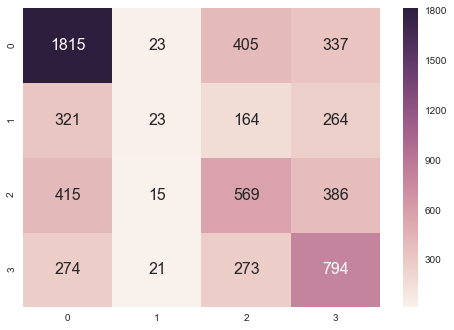

In [56]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.529595015576

             precision    recall  f1-score   support

          1       0.70      0.69      0.70      2580
          2       0.27      0.30      0.28       772
          3       0.40      0.42      0.41      1385
          4       0.50      0.48      0.49      1362

avg / total       0.53      0.53      0.53      6099

macro precision:  0.469241277497
micro precision:  0.529595015576

micro recall:  0.529595015576
macro recall:  0.469202081388

micro f1:  0.529595015576
macro f1:  0.468966732312


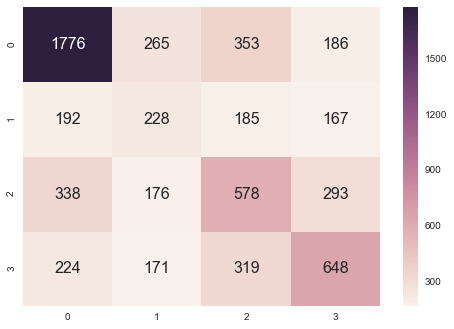

In [57]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.487948844073

             precision    recall  f1-score   support

          1       0.65      0.63      0.64      2580
          2       0.26      0.27      0.26       772
          3       0.38      0.39      0.39      1385
          4       0.43      0.43      0.43      1362

avg / total       0.49      0.49      0.49      6099

macro precision:  0.431334192567
micro precision:  0.487948844073

micro recall:  0.487948844073
macro recall:  0.432415446086

micro f1:  0.487948844073
macro f1:  0.431779301342


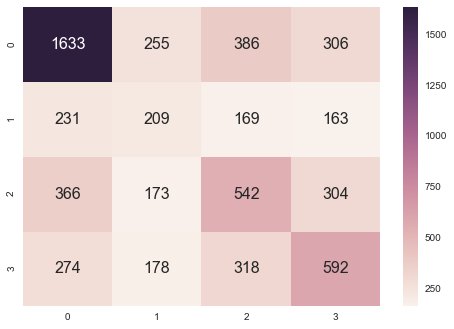

In [58]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.600262338088

             precision    recall  f1-score   support

          1       0.68      0.84      0.75      2580
          2       0.41      0.20      0.27       772
          3       0.48      0.45      0.46      1385
          4       0.56      0.53      0.55      1362

avg / total       0.58      0.60      0.58      6099

macro precision:  0.534736707851
micro precision:  0.600262338088

micro recall:  0.600262338088
macro recall:  0.503388606233

micro f1:  0.600262338088
macro f1:  0.507628351584


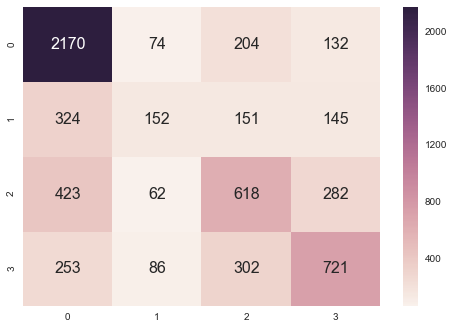

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.431546155107

             precision    recall  f1-score   support

          1       0.70      0.52      0.60      2580
          2       0.18      0.53      0.27       772
          3       0.41      0.36      0.38      1385
          4       0.56      0.28      0.37      1362

avg / total       0.54      0.43      0.46      6099

macro precision:  0.462417427978
micro precision:  0.431546155107

micro recall:  0.431546155107
macro recall:  0.421643103914

micro f1:  0.431546155107
macro f1:  0.404756650193


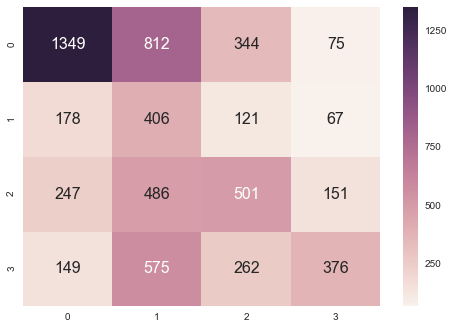

In [60]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.448598130841

             precision    recall  f1-score   support

          1       0.54      0.72      0.62      2580
          2       0.17      0.11      0.13       772
          3       0.35      0.32      0.34      1385
          4       0.38      0.26      0.31      1362

avg / total       0.42      0.45      0.42      6099

macro precision:  0.361577743811
micro precision:  0.448598130841

micro recall:  0.448598130841
macro recall:  0.351554534096

micro f1:  0.448598130841
macro f1:  0.348607752323


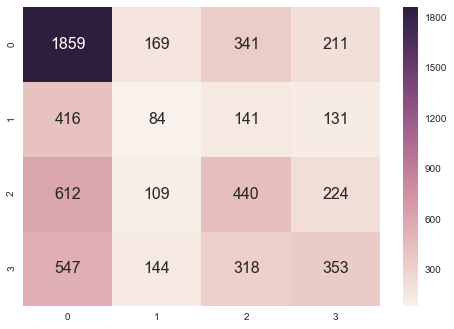

In [61]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.598622725037

             precision    recall  f1-score   support

          1       0.71      0.82      0.76      2580
          2       0.26      0.05      0.08       772
          3       0.48      0.47      0.48      1385
          4       0.53      0.61      0.57      1362

avg / total       0.56      0.60      0.57      6099

macro precision:  0.49341914006
micro precision:  0.598622725037

micro recall:  0.598622725037
macro recall:  0.489210513553

micro f1:  0.598622725037
macro f1:  0.471063632792


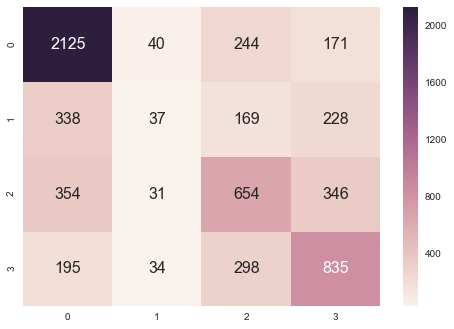

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [63]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

accuracy:  0.597311034596

             precision    recall  f1-score   support

          1       0.69      0.83      0.76      2580
          2       0.31      0.02      0.03       772
          3       0.48      0.46      0.47      1385
          4       0.52      0.62      0.56      1362

avg / total       0.56      0.60      0.56      6099

macro precision:  0.499969361763
micro precision:  0.597311034596

micro recall:  0.597311034596
macro recall:  0.482171107615

micro f1:  0.597311034596
macro f1:  0.455572152862


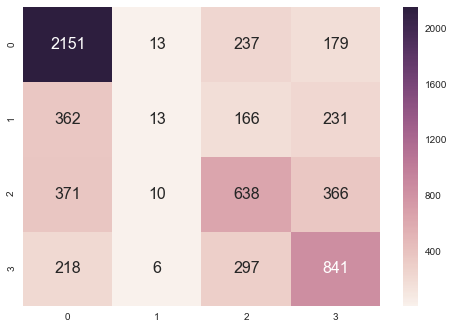

In [64]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.598130841121

             precision    recall  f1-score   support

          1       0.70      0.83      0.76      2580
          2       0.33      0.02      0.04       772
          3       0.47      0.47      0.47      1385
          4       0.52      0.62      0.57      1362

avg / total       0.56      0.60      0.56      6099

macro precision:  0.504874696924
micro precision:  0.598130841121

micro recall:  0.598130841121
macro recall:  0.483852784849

micro f1:  0.598130841121
macro f1:  0.457920418325


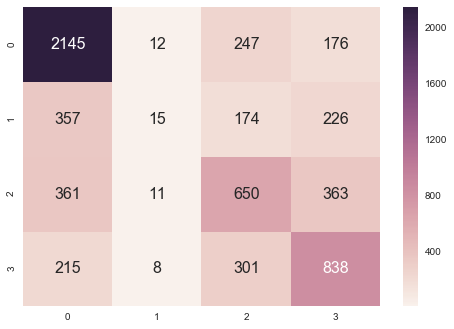

In [65]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.593375963273

             precision    recall  f1-score   support

          1       0.71      0.82      0.76      2580
          2       0.28      0.11      0.16       772
          3       0.47      0.44      0.46      1385
          4       0.53      0.58      0.55      1362

avg / total       0.56      0.59      0.57      6099

macro precision:  0.49836806631
micro precision:  0.593375963273

micro recall:  0.593375963273
macro recall:  0.490622180836

micro f1:  0.593375963273
macro f1:  0.484049752815


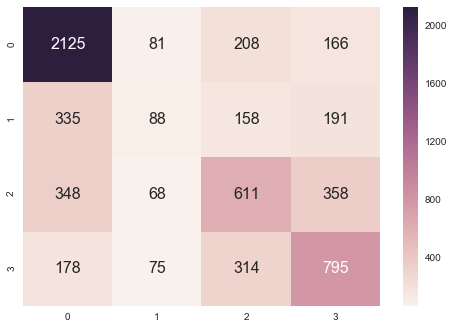

In [66]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.362026561731

             precision    recall  f1-score   support

          1       0.56      0.40      0.47      2580
          2       0.15      0.05      0.07       772
          3       0.30      0.32      0.31      1385
          4       0.27      0.50      0.35      1362

avg / total       0.39      0.36      0.36      6099

macro precision:  0.322191210872
micro precision:  0.362026561731

micro recall:  0.362026561731
macro recall:  0.31875196643

micro f1:  0.362026561731
macro f1:  0.301357621593


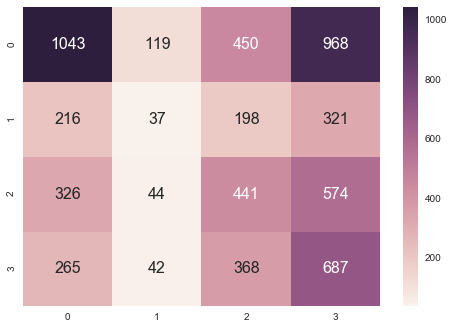

In [67]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.16806033776

             precision    recall  f1-score   support

          1       0.73      0.04      0.08      2580
          2       0.13      0.95      0.23       772
          3       0.38      0.12      0.18      1385
          4       0.54      0.02      0.03      1362

avg / total       0.53      0.17      0.11      6099

macro precision:  0.447343251465
micro precision:  0.16806033776

micro recall:  0.16806033776
macro recall:  0.281112590822

micro f1:  0.16806033776
macro f1:  0.130855067606


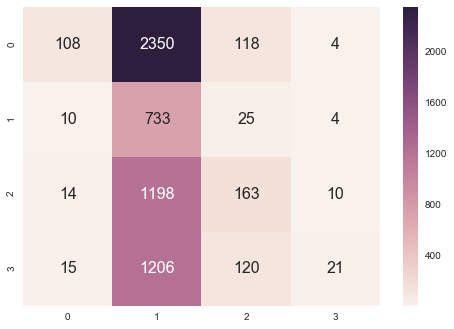

In [68]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [69]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.598622725037

             precision    recall  f1-score   support

          1       0.69      0.85      0.76      2580
          2       0.37      0.20      0.26       772
          3       0.47      0.43      0.45      1385
          4       0.57      0.52      0.55      1362

avg / total       0.57      0.60      0.58      6099

macro precision:  0.526913964292
micro precision:  0.598622725037

micro recall:  0.598622725037
macro recall:  0.500218419394

micro f1:  0.598622725037
macro f1:  0.504143715383


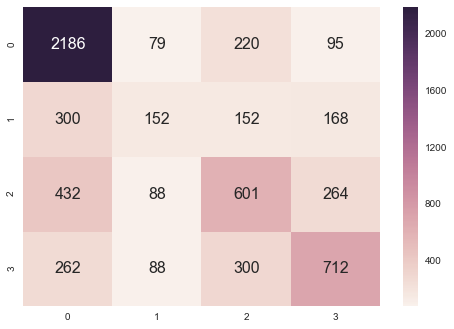

In [70]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

accuracy:  0.591572388916

             precision    recall  f1-score   support

          1       0.66      0.86      0.75      2580
          2       0.43      0.00      0.01       772
          3       0.50      0.39      0.44      1385
          4       0.51      0.61      0.56      1362

avg / total       0.56      0.59      0.54      6099

macro precision:  0.525679043986
micro precision:  0.591572388916

micro recall:  0.591572388916
macro recall:  0.467716394127

micro f1:  0.591572388916
macro f1:  0.438085321006


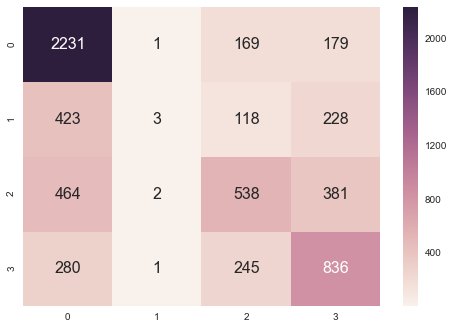

In [71]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.590588621085

             precision    recall  f1-score   support

          1       0.66      0.87      0.75      2580
          2       0.30      0.00      0.01       772
          3       0.50      0.39      0.44      1385
          4       0.51      0.61      0.56      1362

avg / total       0.54      0.59      0.54      6099

macro precision:  0.492439464036
micro precision:  0.590588621085

micro recall:  0.590588621085
macro recall:  0.466017636478

micro f1:  0.590588621085
macro f1:  0.436753379024


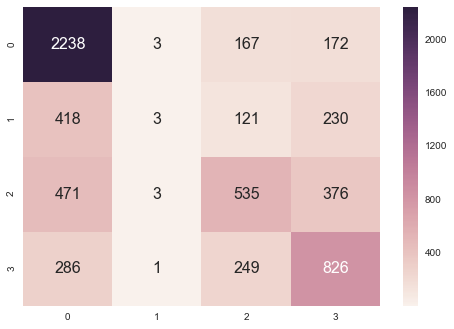

In [72]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.476635514019

             precision    recall  f1-score   support

          1       0.64      0.68      0.66      2580
          2       0.18      0.27      0.21       772
          3       0.38      0.28      0.33      1385
          4       0.46      0.40      0.43      1362

avg / total       0.48      0.48      0.48      6099

macro precision:  0.415822684207
micro precision:  0.476635514019

micro recall:  0.476635514019
macro recall:  0.408028570498

micro f1:  0.476635514019
macro f1:  0.407389019062


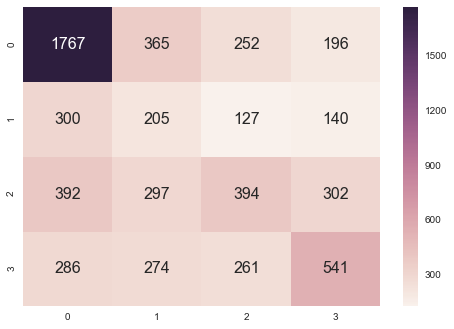

In [73]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.58403016888

             precision    recall  f1-score   support

          1       0.65      0.86      0.74      2580
          2       0.00      0.00      0.00       772
          3       0.49      0.38      0.43      1385
          4       0.50      0.61      0.55      1362

avg / total       0.50      0.58      0.53      6099

macro precision:  0.412217464487
micro precision:  0.58403016888

micro recall:  0.58403016888
macro recall:  0.460813350324

micro f1:  0.58403016888
macro f1:  0.429734834979


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

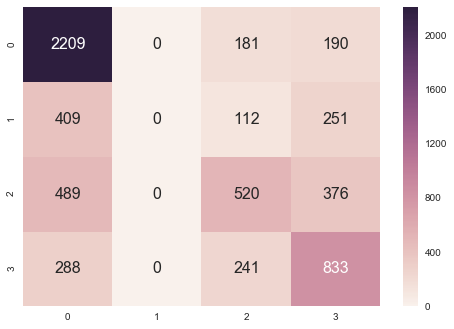

In [74]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.549926217413

             precision    recall  f1-score   support

          1       0.56      0.90      0.69      2580
          2       0.90      0.06      0.10       772
          3       0.49      0.32      0.39      1385
          4       0.54      0.40      0.46      1362

avg / total       0.58      0.55      0.50      6099

macro precision:  0.62035563368
micro precision:  0.549926217413

micro recall:  0.549926217413
macro recall:  0.418839926034

micro f1:  0.549926217413
macro f1:  0.410380198801


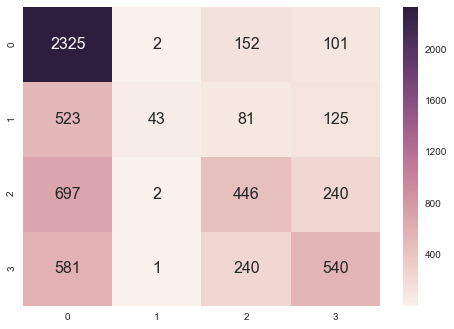

In [75]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.613215281194

             precision    recall  f1-score   support

          1       0.71      0.84      0.77      2580
          2       0.40      0.04      0.08       772
          3       0.48      0.49      0.48      1385
          4       0.55      0.63      0.59      1362

avg / total       0.58      0.61      0.58      6099

macro precision:  0.535203633553
micro precision:  0.613215281194

micro recall:  0.613215281194
macro recall:  0.500762239618

micro f1:  0.613215281194
macro f1:  0.480216250907


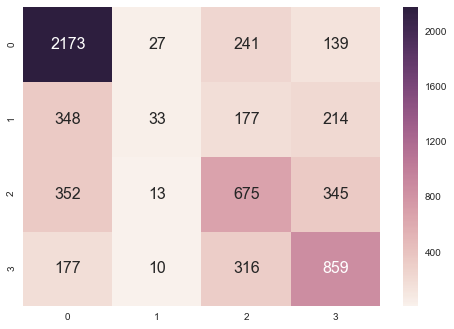

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [77]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.589276930644

             precision    recall  f1-score   support

          1       0.65      0.87      0.74      2580
          2       0.30      0.00      0.01       772
          3       0.50      0.39      0.44      1385
          4       0.52      0.59      0.55      1362

avg / total       0.54      0.59      0.54      6099

macro precision:  0.492232794943
micro precision:  0.589276930644

micro recall:  0.589276930644
macro recall:  0.464094598555

micro f1:  0.589276930644
macro f1:  0.435891055405


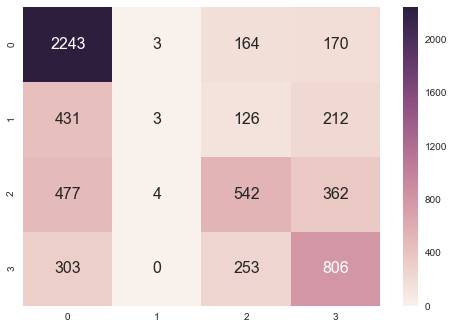

In [78]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [79]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [80]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.202820134448

             precision    recall  f1-score   support

          1       0.94      0.15      0.26      2580
          2       0.14      0.98      0.24       772
          3       0.49      0.03      0.06      1385
          4       0.67      0.03      0.07      1362

avg / total       0.68      0.20      0.17      6099

macro precision:  0.560266583442
micro precision:  0.202820134448

micro recall:  0.202820134448
macro recall:  0.298330590584

micro f1:  0.202820134448
macro f1:  0.156354245115


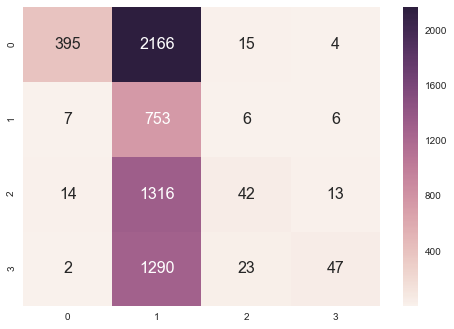

In [81]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.298573536645

             precision    recall  f1-score   support

          1       0.90      0.35      0.51      2580
          2       0.15      0.87      0.26       772
          3       0.39      0.16      0.22      1385
          4       0.68      0.01      0.03      1362

avg / total       0.64      0.30      0.30      6099

macro precision:  0.529993113329
micro precision:  0.298573536645

micro recall:  0.298573536645
macro recall:  0.349053307167

micro f1:  0.298573536645
macro f1:  0.253591362103


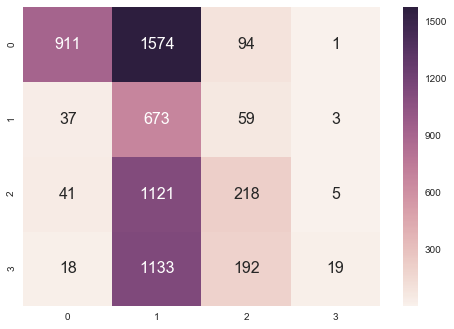

In [82]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.288735858337

             precision    recall  f1-score   support

          1       0.89      0.33      0.48      2580
          2       0.15      0.88      0.25       772
          3       0.41      0.10      0.17      1385
          4       0.70      0.07      0.13      1362

avg / total       0.65      0.29      0.30      6099

macro precision:  0.537059746967
micro precision:  0.288735858337

micro recall:  0.288735858337
macro recall:  0.345226772733

micro f1:  0.288735858337
macro f1:  0.255194985622


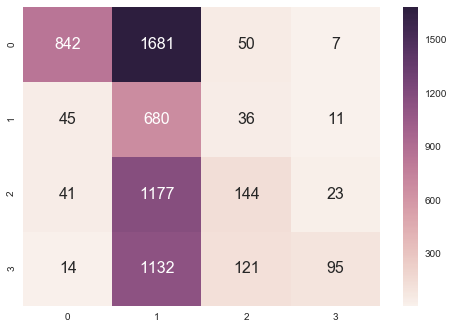

In [83]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [84]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.52,0.64,0.25,0.40,0.44,0.70,0.02,0.41,0.58,0.41
23,BernoulliNB,áno,0.52,0.64,0.28,0.40,0.45,0.70,0.03,0.41,0.58,0.41
1,DecisionTreeClassifier,nie,0.54,0.71,0.28,0.41,0.51,0.70,0.31,0.42,0.47,0.47
24,DecisionTreeClassifier,áno,0.53,0.70,0.27,0.40,0.50,0.69,0.30,0.42,0.48,0.47
2,ExtraTreeClassifier,nie,0.49,0.64,0.26,0.41,0.45,0.63,0.27,0.41,0.44,0.44
25,ExtraTreeClassifier,áno,0.49,0.65,0.26,0.38,0.43,0.63,0.27,0.39,0.43,0.43
3,ExtraTreesClassifier,nie,0.59,0.65,0.40,0.50,0.57,0.85,0.20,0.45,0.46,0.50
26,ExtraTreesClassifier,áno,0.60,0.68,0.41,0.48,0.56,0.84,0.20,0.45,0.53,0.51
4,GaussianNB,nie,0.27,0.92,0.14,0.25,0.23,0.08,0.08,0.93,0.05,0.18
27,GaussianNB,áno,0.43,0.70,0.18,0.41,0.56,0.52,0.53,0.36,0.28,0.40


### Results sorted by Accuracy

In [85]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['S'], ascending=False)

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
18,GradientBoostingClassifier,nie,0.61,0.70,0.34,0.49,0.56,0.86,0.04,0.48,0.60,0.48
41,GradientBoostingClassifier,áno,0.61,0.71,0.40,0.48,0.55,0.84,0.04,0.49,0.63,0.48
35,RandomForestClassifier,áno,0.60,0.69,0.37,0.47,0.57,0.85,0.20,0.43,0.52,0.50
26,ExtraTreesClassifier,áno,0.60,0.68,0.41,0.48,0.56,0.84,0.20,0.45,0.53,0.51
30,LogisticRegression,áno,0.60,0.69,0.31,0.48,0.52,0.83,0.02,0.46,0.62,0.46
31,LogisticRegressionCV,áno,0.60,0.70,0.33,0.47,0.52,0.83,0.02,0.47,0.62,0.46
12,RandomForestClassifier,nie,0.60,0.67,0.41,0.49,0.60,0.84,0.20,0.44,0.55,0.51
29,LinearDiscriminantAnalysis,áno,0.60,0.71,0.26,0.48,0.53,0.82,0.05,0.47,0.61,0.47
37,RidgeClassifierCV,áno,0.59,0.66,0.30,0.50,0.51,0.87,0.00,0.39,0.61,0.44
32,MLPClassifier,áno,0.59,0.71,0.28,0.47,0.53,0.82,0.11,0.44,0.58,0.48


In [86]:
# store results
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['Algoritmus', 'Transformácia']).to_csv('results/meta_lsa_lda.csv')

In [87]:
df_results.describe()

,F1_makro,P_0,P_1,P_2,P_3,S,Ú_0,Ú_1,Ú_2,Ú_3
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.368043,0.633478,0.265217,0.404130,0.473261,0.471304,0.648913,0.208913,0.327826,0.430000
std,0.117466,0.173963,0.188818,0.119565,0.127733,0.136408,0.290603,0.266935,0.192445,0.223637
min,0.090000,0.000000,0.000000,0.000000,0.170000,0.170000,0.000000,0.000000,0.000000,0.010000
25%,0.300000,0.577500,0.140000,0.380000,0.432500,0.412500,0.547500,0.020000,0.167500,0.287500
50%,0.410000,0.650000,0.255000,0.415000,0.510000,0.515000,0.745000,0.115000,0.390000,0.510000
75%,0.455000,0.700000,0.325000,0.480000,0.547500,0.590000,0.857500,0.270000,0.437500,0.580000
max,0.510000,0.940000,0.940000,0.620000,0.700000,0.610000,0.980000,0.980000,0.930000,1.000000
